In [1]:
import pandas as pd

In [2]:
athletes = pd.read_csv("bgadoci-crossfit-data/athletes.csv")
athletes

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423001,574489.0,Odo Renata,Latin America,Team Guarujá Inox,CrossFit Guaruja,Female,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:05
423002,585696.0,Lozzie Trevor,Australia,FBP CrossFit Games Team,FBP CrossFit,Female,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:06
423003,608828.0,Marisol Smith,North West,CrossFit Oak Harbor,CrossFit Oak Harbor,Female,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:07
423004,628881.0,Pedrini Morgane,Europe,NaN,CrossFit 67,Female,20.0,64.0,61.0,NaN,...,80.0,143.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,NaN,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I strictly s...,6-12 months|,2015-03-25 09:55:07


## Braden's Preprocessing Section - Join Data and Filter Columns

In [3]:
# First need to read in the leader dataset
leader = pd.read_csv("bgadoci-crossfit-data/leaderboard.15.csv")

In [4]:
# Join on athlete ID
df = pd.merge(athletes, leader, on='athlete_id', how='inner')
# Make sure it looks okay
df.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,schedule,howlong,retrieved_datetime_x,year,division,stage,rank,score,retrieved_datetime_y,scaled
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,5.0,44119.0,771.0,2015-03-31 21:47:26,0
1,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.0,43966.0,130.0,2015-03-31 23:02:54,0
2,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.1,32461.0,225.0,2015-03-31 23:30:57,0
3,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,2.0,58455.0,78.0,2015-03-31 23:53:31,0
4,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,3.0,30179.0,314.0,2015-04-01 00:27:51,0


In [5]:
# Drop all of our na's and check for unique values in each column
testing = df.dropna()
testing.nunique()

athlete_id               679
name                     679
region                    17
team                     574
affiliate                567
gender                     2
age                       38
height                    23
weight                   120
fran                     313
helen                    335
grace                    270
filthy50                 503
fgonebad                 247
run400                    95
run5k                    381
candj                    120
snatch                   113
deadlift                 141
backsq                   133
pullups                   80
eat                       23
train                     45
background                18
experience                43
schedule                  51
howlong                   12
retrieved_datetime_x     675
year                       1
division                   2
stage                      6
rank                    2427
score                    775
retrieved_datetime_y    2211
scaled        

NOTE: We noticed in our EDA that several variables had absurd responses: 800,000 pullups, 5,000 lb. back squat etc... So we used our best judgement to determine where the cutoff for a reasonable score on each continuous variable might be.

In [6]:
# How many rows we have before
print(len(testing))

3802


In [7]:
# Filtered Dataframes
testing = testing[testing['fran'] < 1250]
testing = testing[testing['helen'] < 2000]
testing = testing[testing['grace'] < 1000]
testing = testing[testing['filthy50'] < 4000]
testing = testing[testing['fgonebad'] < 625]
testing = testing[testing['run400'] < 200]
testing = testing[testing['run5k'] < 3000]
testing = testing[testing['candj'] < 500]
testing = testing[testing['snatch'] < 350]
testing = testing[testing['deadlift'] < 750]
testing = testing[testing['backsq'] < 750]
testing = testing[testing['pullups'] < 74]


In [8]:
# Number of rows now
print(len(testing))

3625


3802
3625

<AxesSubplot:>

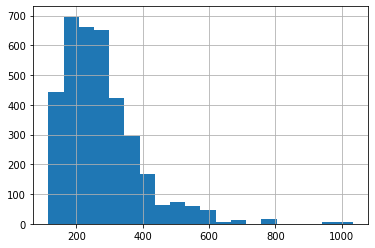

In [9]:
# Histogram to illustrate the distribution looks okay 
testing.fran.hist(bins = 20)



In [10]:
#athletes.eat.unique()

Possible values for eat:
* I eat quality foods but don't measure the amount
* I eat strict Paleo
* I eat 1-3 full cheat meals per week
* I eat whatever is convenient
* I weigh and measure my food

In [11]:
#athletes.train.unique()

Possible values for train:
* I workout mostly at a CrossFit Affiliate
* I have a coach who determines my programming
* I record my workouts
* I incorporate CrossFit.com workouts
* I write my own programming
* I workout mostly at home, work, or a traditional gym



In [12]:
import numpy as np
athletes = testing

In [13]:
# calculate dummies for train column
athletes = athletes.dropna()
a = athletes["train"].str.split('|').explode().to_frame()
cols = a["train"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["train"])[cols]], axis=1)

athletes.drop('train', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,score,retrieved_datetime_y,scaled,I workout mostly at a CrossFit Affiliate,"I workout mostly at home, work, or a traditional gym",I have a coach who determines my programming,I incorporate CrossFit.com workouts,I write my own programming,I record my workouts,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,498.0,2015-03-31 21:45:10,0,1,1,1,1,1,1,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,170.0,2015-03-31 22:59:41,0,1,1,1,1,1,1,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,240.0,2015-03-31 23:28:06,0,1,1,1,1,1,1,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,244.0,2015-03-31 23:52:32,0,1,1,1,1,1,1,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,340.0,2015-04-01 00:17:05,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,131.0,2015-03-31 23:23:15,1,1,0,0,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,115.0,2015-03-31 23:48:30,1,1,0,0,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,135.0,2015-04-01 00:11:44,1,1,0,0,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,533.0,2015-04-01 00:40:56,1,1,0,0,0,0,1,0


In [14]:
# calculate dummies for background column
a = athletes["background"].str.split('|').explode().to_frame()
cols = a["background"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["background"])[cols]], axis=1)

athletes.drop('background', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I incorporate CrossFit.com workouts,I write my own programming,I record my workouts,Decline to answer,I played youth or high school level sports,I regularly play recreational sports,I played college sports,I played professional sports,I have no athletic background besides CrossFit,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0


In [15]:
# calculate dummies for experience column
a = athletes["experience"].str.split('|').explode().to_frame()
cols = a["experience"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["experience"])[cols]], axis=1)

athletes.drop('experience', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I played professional sports,I have no athletic background besides CrossFit,Decline to answer,I began CrossFit by trying it alone (without a coach),I have completed the CrossFit Level 1 certificate course,I train other people,I have attended one or more specialty courses,I have had a life changing experience due to CrossFit,I began CrossFit with a coach (e.g. at an affiliate),Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0


In [16]:
# calculate dummies for schedule column
a = athletes["schedule"].str.split('|').explode().to_frame()
cols = a["schedule"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["schedule"])[cols]], axis=1)

athletes.drop('schedule', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I began CrossFit with a coach (e.g. at an affiliate),Decline to answer,I do multiple workouts in a day 3+ times a week,I typically rest fewer than 4 days per month,I typically rest 4 or more days per month,I usually only do 1 workout a day,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0


In [17]:
# calculate dummies for schedule column
a = athletes["eat"].str.split('|').explode().to_frame()
cols = a["eat"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["eat"])[cols]], axis=1)

athletes.drop('eat', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0


In [18]:
athletes.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
#athletes.background.unique()

Possible values for background:
* I played youth or high school level sports
* I regularly play recreational sports
* I played college sports
* I have no athletic background besides CrossFit
* I played professional sports

In [20]:
#athletes.experience.unique()

Possible values for experience: 
* I began CrossFit with a coach (e.g. at an affiliate)
* I have attended one or more specialty courses
* I have had a life changing experience due to CrossFit
* I began CrossFit by trying it alone (without a coach)
* I have completed the CrossFit Level 1 certificate course
* I train other people


In [21]:
#athletes.schedule.unique()

Possible values for schedule:
* I do multiple workouts in a day 2x a week
* I usually only do 1 workout a day
* I strictly schedule my rest days
* I typically rest 4 or more days per month
* I do multiple workouts in a day 3+ times a week
* I typically rest fewer than 4 days per month
* I do multiple workouts in a day 1x a week

In [22]:
#athletes.howlong.unique()

In [23]:
athletes.age.describe()

count    3625.000000
mean       33.588414
std         7.245915
min        17.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        54.000000
Name: age, dtype: float64

In [24]:
athletes.height.describe()

count    3625.000000
mean       69.039724
std         3.733916
min        59.000000
25%        66.000000
50%        69.000000
75%        72.000000
max        78.000000
Name: height, dtype: float64

In [25]:
athletes.weight.describe()

count    3625.000000
mean      174.781517
std        30.252848
min       112.000000
25%       150.000000
50%       178.000000
75%       196.000000
max       274.000000
Name: weight, dtype: float64

In [26]:
 athletes.fran.describe()

count    3625.000000
mean      274.852414
std       117.142008
min       115.000000
25%       189.000000
50%       255.000000
75%       330.000000
max      1033.000000
Name: fran, dtype: float64

In [27]:
 athletes.helen.describe()

count    3625.000000
mean      582.323310
std       117.431788
min        60.000000
25%       500.000000
50%       560.000000
75%       634.000000
max      1440.000000
Name: helen, dtype: float64

In [28]:
 athletes.grace.describe()

count    3625.000000
mean      196.566069
std        91.128636
min        64.000000
25%       136.000000
50%       173.000000
75%       226.000000
max       696.000000
Name: grace, dtype: float64

In [29]:
 athletes.filthy50.describe()

count    3625.000000
mean     1505.392552
std       388.943142
min        60.000000
25%      1224.000000
50%      1442.000000
75%      1693.000000
max      3600.000000
Name: filthy50, dtype: float64

In [30]:
 athletes.fgonebad.describe()

count    3625.000000
mean      321.045793
std        73.289408
min         0.000000
25%       285.000000
50%       321.000000
75%       363.000000
max       486.000000
Name: fgonebad, dtype: float64

In [31]:
 athletes.run400.describe()

count    3625.000000
mean       73.112000
std        15.816924
min        31.000000
25%        62.000000
50%        70.000000
75%        80.000000
max       181.000000
Name: run400, dtype: float64

In [32]:
 athletes.run5k.describe()

count    3625.000000
mean     1389.673931
std       223.481272
min        60.000000
25%      1248.000000
50%      1362.000000
75%      1496.000000
max      2700.000000
Name: run5k, dtype: float64

In [33]:
 athletes.candj.describe()

count    3625.00000
mean      218.17131
std        55.22091
min         0.00000
25%       176.00000
50%       215.00000
75%       260.00000
max       408.00000
Name: candj, dtype: float64

In [34]:
 athletes.snatch.describe()

count    3625.000000
mean      168.116966
std        46.373771
min         0.000000
25%       135.000000
50%       165.000000
75%       200.000000
max       310.000000
Name: snatch, dtype: float64

In [35]:
 athletes.deadlift.describe()

count    3625.000000
mean      379.411586
std        91.395744
min         0.000000
25%       305.000000
50%       386.000000
75%       445.000000
max       661.000000
Name: deadlift, dtype: float64

In [36]:
 athletes.backsq.describe()

count    3625.000000
mean      306.580690
std        80.134322
min         0.000000
25%       245.000000
50%       305.000000
75%       365.000000
max       617.000000
Name: backsq, dtype: float64

In [37]:
 athletes.pullups.describe()

count    3625.000000
mean       33.574621
std        13.837516
min         0.000000
25%        24.000000
50%        32.000000
75%        42.000000
max        72.000000
Name: pullups, dtype: float64

In [38]:
athletes[athletes.pullups > 1000]

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer


In [40]:
athletes["male"] = pd.get_dummies(athletes.gender)["Male"]

In [41]:
athletes.drop('athlete_id', axis=1)

,name,region,team,affiliate,gender,age,height,weight,fran,helen,...,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer,male
82091,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82092,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82093,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82094,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82095,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384130,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384131,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384132,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0


In [42]:
X = athletes.drop(['rank', 'athlete_id', 'name', 'region', 'team', 'affiliate', 'howlong', 'retrieved_datetime_x','retrieved_datetime_y', 'gender'], axis=1)
y = athletes["rank"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=801)

Decision tree model

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
# import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# split train and test
# done above

In [49]:
def PipeTree(max_depth=None):
    return make_pipeline(StandardScaler(),
                         DecisionTreeRegressor(max_depth=6, random_state=0))

In [50]:
pipe = PipeTree()
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [51]:
pipe = PipeTree(max_depth=5)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [52]:
pipe = PipeTree(max_depth=3)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [53]:
pipe.named_steps

{'standardscaler': StandardScaler(),
 'decisiontreeregressor': DecisionTreeRegressor(max_depth=6, random_state=0)}

In [54]:
# takes a long time to run
param_grid = [{'decisiontreeregressor__max_depth': list(np.arange(1,50))},
             {'decisiontreeregressor__min_samples_leaf': list(np.arange(1,20))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
gs.best_params_

{'decisiontreeregressor__max_depth': 16}

In [99]:
pipe = PipeTree(max_depth=16)
pipe.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [56]:
y_hat = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
mse

159448160.3371406

## Bagging

In [67]:
# Need to import the bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [108]:
decision_tree = DecisionTreeRegressor(max_depth=16, random_state=0)

In [115]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)
X_test = X_test.astype(float)

In [116]:
# Define our classifier with n_estimators as 100
bag = BaggingClassifier(base_estimator = decision_tree, n_estimators=100, n_jobs=-1) # Note: Default is decision Tree

# Fit the model
bag.fit(X_train,y_train)

# Make predictions
bag_pred = bag.predict(X_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [85]:
# Import metrics
from sklearn import metrics

# Check the confusion matrix
metrics.confusion_matrix(y_test, bag_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [92]:
# Look at the classification report
print(metrics.classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

        14.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         0
        22.0       0.00      0.00      0.00         1
        35.0       0.00      0.00      0.00         1
        43.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         2
        54.0       0.00      0.00      0.00         1
        62.0       0.00      0.00      0.00         1
        66.0       0.00      0.00      0.00         0
        72.0       0.00      0.00      0.00         1
        74.0       0.00      0.00      0.00         0
        81.0       0.00      0.00      0.00         1
        83.0       0.00      0.00      0.00         0
        88.0       0.00      0.00      0.00         0
        95.0       0.00      0.00      0.00         1
       100.0       0.00      0.00      0.00         0
       107.0       0.00    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

In [96]:
# What was our accuracy with the model? 
print(metrics.accuracy_score(y_test, bag_pred))
print(bag.score(X_test, y_test))
print()

0.22058823529411764
0.22058823529411764


In [97]:
# Calculate the mean squared error
BagMSE = mean_squared_error(y_test, bag_pred)
print(BagMSE)

206796653.4365809


In [98]:
159448160.3371406 - 206796653.4365809

-47348493.09944031

knn